# Credit Card Fraud Detection





## 1. Importing Libraries

Importing the necessary libraries and checking the version along with imiporting the libraries so that we can see that the libraries are installed and loaded correctly.

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))


Python: 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Numpy: 1.15.4
Pandas: 0.23.4
Matplotlib: 3.0.2
Seaborn: 0.9.0
Scipy: 1.1.0
Sklearn: 0.20.1


In [2]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing Data Set

Importing the dataset from a .csv file present in the same directory named as creditcard.csv as a Pandas DataFrame.

In [3]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

### 3. Exploring Data Set

Exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix. 

#### Feature Technicalities:

##### PCA Transformation:
The description of the data says that all the features went through a PCA transformation, a Dimensionality Reduction technique - Except for time and amount.

##### Scaling: 
In order to implement a PCA transformation features need to be previously scaled. In this case, all the V features have been scaled

#### Data Shape

In [4]:
print('This data frame has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

This data frame has 284807 rows and 31 columns.


#### Checking for NULL values in data

In [5]:
data.isnull().sum().max()

0

#### Data info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### Exploring various columns in dataset

In [7]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


#### Random dataset sample

In [8]:
# Few random data points in the dataset
# For first few data.head()
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
113654,73152.0,-0.991892,-2.031197,1.485893,-1.486355,-3.259684,0.461705,1.061929,-0.033251,-2.203361,...,0.292653,0.214201,1.382792,0.492896,-0.206556,-0.293808,-0.094024,0.079205,567.00,0
116552,74327.0,-6.360571,4.975434,-2.745839,-2.560837,1.252738,2.996115,0.084079,1.131270,4.456396,...,-1.243678,-1.296772,0.182068,0.890281,1.144212,0.035309,1.378214,0.271233,10.74,0
88427,62137.0,1.097584,0.113147,0.511277,1.494274,-0.372204,-0.377071,0.076742,-0.019030,0.331815,...,-0.071520,-0.042661,-0.036948,0.397544,0.596278,-0.333391,0.033288,0.022227,31.00,0
23147,32613.0,1.032214,-0.242528,0.686438,0.727276,-0.977208,-1.002370,-0.076864,-0.184991,0.278369,...,0.212466,0.438207,-0.131297,0.773786,0.354708,0.556416,-0.044631,0.035935,105.16,0
185215,126572.0,2.159060,-0.853608,-1.775541,-1.182879,-0.113535,-0.539175,-0.356201,-0.098176,-0.714973,...,0.077081,-0.034617,0.189541,0.248474,-0.103244,-0.337246,-0.069728,-0.067800,43.00,0


#### Numerical summary

In [9]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

#### Histogram of each parameter

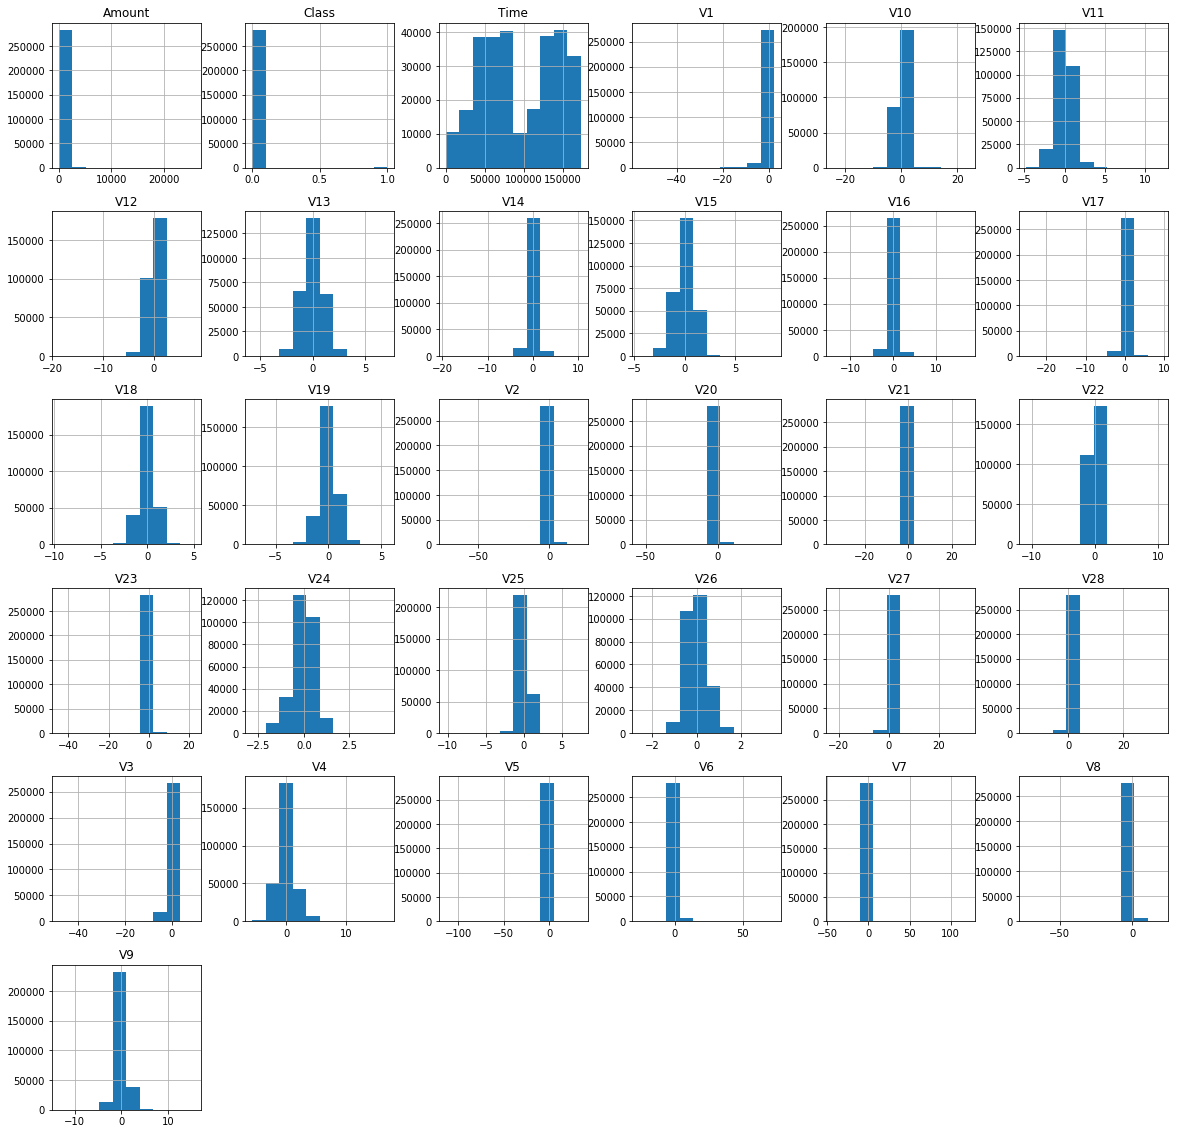

In [10]:
data.hist(figsize = (20, 20))
plt.show()

#### Visualization of time

/home/gaurav/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


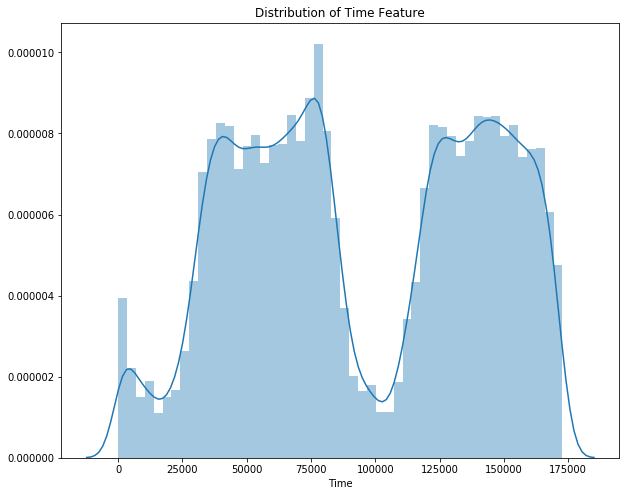

In [11]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(data.Time)

#### Visualization of amount

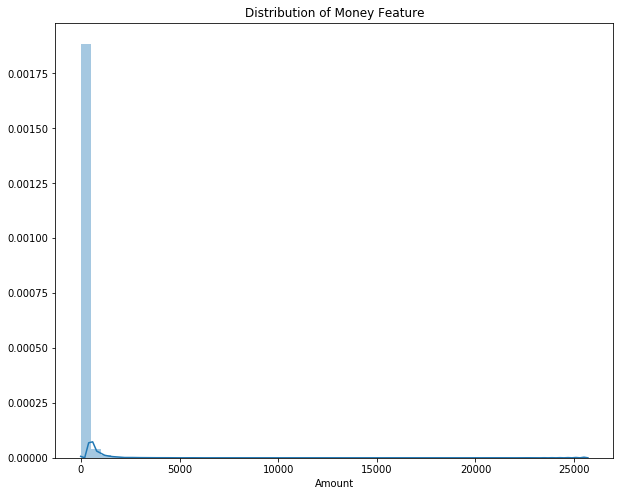

In [12]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Money Feature')
sns.distplot(data.Amount)

#### Visualization of Class

Text(0.5, 1.0, 'Count of Fraud (Class - 1) vs Non-Fraud (Class - 0)')

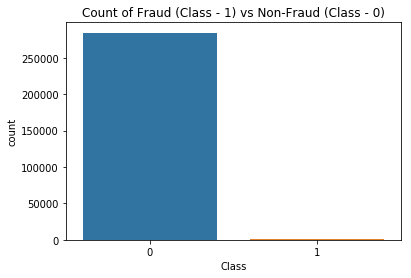

In [13]:
sns.countplot('Class', data=data)
plt.title('Count of Fraud (Class - 1) vs Non-Fraud (Class - 0)', fontsize=12)

#### Number of fraud and non-fraud class in whole dataset

In [14]:
counts = data.Class.value_counts()
Valid = counts[0]
Fraud = counts[1]
perc_valid = (Valid/(Valid+Fraud))*100
perc_fraud = (Fraud/(Valid+Fraud))*100

print(f'Fraud Cases: {Fraud}')
print(f'Valid Transactions: {Valid}')
print(f'Percentage of Valid Cases: {perc_valid}')
print(f'Percentage of Fraud Transactions: {perc_fraud}')

Fraud Cases: 492
Valid Transactions: 284315
Percentage of Valid Cases: 99.82725143693798
Percentage of Fraud Transactions: 0.1727485630620034


#### Correlation matrix of Data
To know if there are features that influence heavily in whether a specific transaction is a fraud

##### Negative Correlations:
 Lower these values are, the more likely the end result will be a fraud transaction.
 
##### Positive Correlations: 
Higher these values are, the more likely the end result will be a non fraud transaction.

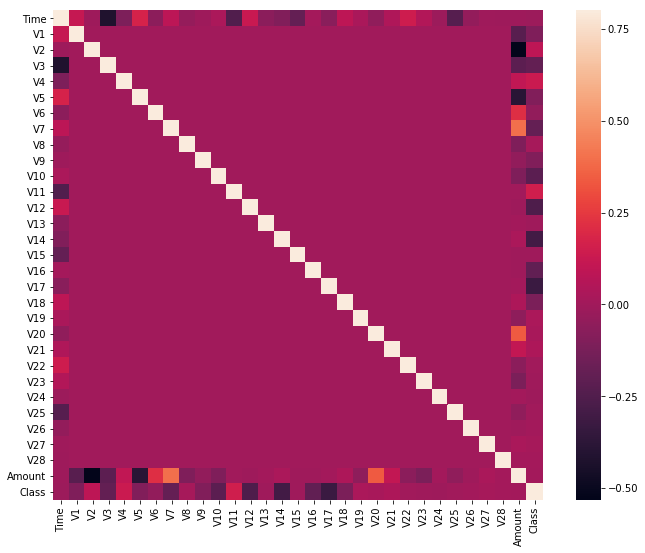

In [15]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

### 4. Fixing data imbalance problem

Most of the transactions are non-fraud(99.8%). If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud

Most machine learning algorithms and works best when the number of instances of each classes are roughly equal. When the number of instances of one class far exceeds the other, problems arise. 

#### Scaling Time and Amount

Anonymized features have been scaled and seem to be centered around zero but time and amount features have not been scaled. 

Not scaling them as well would result in certain machine learning algorithms that give weights to features (logistic regression) or rely on a distance measure (KNN) performing much worse.

In [16]:
# Scaling Amount and Time
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

# Scaling amount
data['Scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
# Scaling time
data['Scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Dropping old time and amount 
data.drop(['Time','Amount'], axis=1, inplace=True)

# Concating Scaled_amount and Scaled_time with original data
scaled_amount = data['Scaled_amount']
scaled_time = data['Scaled_time']

data.drop(['Scaled_amount', 'Scaled_time'], axis=1, inplace=True)
data.insert(0, 'Scaled_amount', scaled_amount)
data.insert(1, 'Scaled_time', scaled_time)

In [17]:
# Sample of data after scaling amount and time
data.sample(5)

,Scaled_amount,Scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
97311,-0.294977,-0.217719,-0.400558,0.994284,1.142491,-0.177208,0.394773,-0.016562,0.482610,0.262533,...,0.066603,-0.213148,-0.563487,-0.037885,-0.372869,-0.237590,0.106226,0.255439,0.080129,0
42834,-0.139733,-0.510180,-0.121859,0.182201,-0.252993,-2.324065,2.056207,3.197826,-0.402417,0.877687,...,0.296316,-0.118596,-0.647070,-0.054297,0.891589,-0.066862,-0.505597,0.074757,0.077389,0
283946,-0.174527,1.025999,-0.989312,1.367852,-0.540860,-0.510352,-0.184331,-1.140291,0.319020,0.571513,...,-0.290320,-0.140514,-0.542436,0.242414,-0.011888,-0.455471,0.123339,-0.242931,-0.074226,0
108844,-0.254594,-0.159659,-1.093589,1.484839,2.568232,3.009628,-0.754130,0.550876,-0.402803,0.562055,...,0.059565,0.063655,0.161022,-0.211451,0.414324,0.014802,0.214088,-0.247596,0.016330,0
167824,-0.243136,0.401896,2.021642,-0.237720,-0.529448,0.270202,-0.236972,-0.141004,-0.461514,-0.021084,...,-0.139723,-0.198318,-0.409309,0.362848,0.449657,-0.339687,-0.641796,0.035680,-0.025403,0


#### Training Dataset with balanced class distribution

The original dataframe was heavily imbalanced. Using the original dataframe will cause the following issues:
##### Overfitting: 
Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
##### Wrong Correlations: 
Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features

#### Splitting the data

In [18]:
# Splitting data using numpy's random.rand
mask = np.random.rand(len(data)) < 0.9
train = data[mask]
test = data[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256016, 31)
Test Shape: (28791, 31)


In [19]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

#### Random Under Sampling 

Using Random Under Sampling technique to under sample the data in order to solve the data imbalance problem and so that our model to predict fraud does not overfit the data 

There is also risk of information loss when using Undersampling of data

In [20]:
# Counting the no. of fraud transactions in the train dataset = X
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 440 fraudulent transactions in the train data.


In [21]:
#randomly selecting X random non-fraud transactions from the train dataset
not_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
non_fraud = not_fraud.sample(no_of_frauds)
non_fraud.head()

,Scaled_amount,Scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
239706,-0.293579,0.913592,2.013816,-0.152687,-1.020249,0.329359,-0.200724,-0.961452,0.029351,-0.149030,...,-0.268332,-0.240960,-0.633381,0.349437,0.055907,-0.367226,0.175412,-0.079414,-0.070997,0
133466,-0.294977,0.061526,2.086367,0.034907,-1.512238,0.210555,0.382527,-0.773929,0.231364,-0.316840,...,-0.172785,0.244471,0.877707,0.018575,0.658511,0.313670,-0.134058,-0.016763,-0.052042,0
143668,5.199748,0.332617,1.145027,-1.810967,-1.380354,0.191393,0.177545,1.933274,-0.259381,0.511354,...,0.518500,-0.120682,-1.044716,0.168695,-0.957947,-0.919292,0.186635,-0.078679,-0.001104,0
76290,0.195626,-0.284320,1.170472,0.086719,0.020009,1.219428,0.222000,0.307047,0.076951,0.039808,...,-0.116165,-0.141979,-0.237572,-0.188344,-0.748774,0.760217,-0.263189,0.032606,0.012018,0
226424,-0.194928,0.832952,-1.762427,1.932758,-0.462697,-1.263800,0.677458,-0.599766,0.730134,0.490754,...,0.246799,-0.315594,-0.829174,-0.041828,0.589445,0.014951,0.072589,0.346881,0.328840,0


In [23]:
# Concatenating both into a subsample data set with equal class distribution
non_fraud.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [24]:
# Checking the length of subsample 
subsample = pd.concat([non_fraud, fraud])
len(subsample)

880

In [25]:
# Shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,Scaled_amount,Scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.041920,-0.181640,0.057138,-0.391592,0.256134,-2.199423,0.039968,-0.534272,0.054178,-0.208234,...,-0.215773,-0.177772,-0.236603,-0.296630,-1.033526,0.410403,-0.038324,0.005309,-0.001267,0
1,2.347516,0.417568,-1.059218,0.572711,-1.703093,-0.597465,0.177184,-0.111902,0.964158,0.631091,...,-0.417858,0.144797,0.158324,-0.180118,0.284581,0.240058,0.529353,-0.329401,-0.366906,0
2,-0.214910,-0.265898,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,...,0.290187,0.417762,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,1
3,-0.293440,-0.762814,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1
4,-0.241878,0.891047,0.567539,3.309385,-6.631268,6.394574,-0.054172,-2.396535,-2.792489,0.514811,...,0.555412,0.614221,-0.365047,-0.180409,-0.523271,0.645054,0.246466,0.902675,0.473571,1
5,1.836931,-0.329750,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,...,-0.614719,0.077739,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,1
6,-0.041640,-0.587472,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,...,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,1
7,2.330469,-0.775585,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,...,-0.085501,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,1
8,1.089779,-0.394001,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,...,0.860912,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,1
9,-0.293440,0.629836,2.057930,-0.327732,-2.726419,-0.775523,2.454901,3.198474,-0.451752,0.733267,...,-0.169675,0.256416,0.789349,0.040269,0.738357,0.289607,-0.080795,0.002805,-0.064285,0


### 5. Exploring  the Subsample

#### Visualization of Class in subsample

Text(0.5, 0, 'Class')

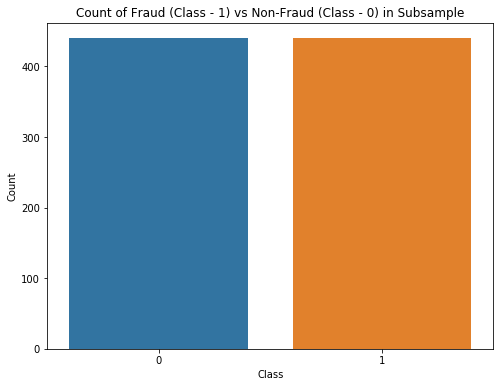

In [26]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraud (Class - 1) vs Non-Fraud (Class - 0) in Subsample')
plt.ylabel('Count')
plt.xlabel('Class')

#### Correlation matrix of subsample 
To know if there are features that influence heavily in whether a specific transaction is a fraud

##### Negative Correlations:
 Lower these values are, the more likely the end result will be a fraud transaction.
 
##### Positive Correlations: 
Higher these values are, the more likely the end result will be a non fraud transaction.

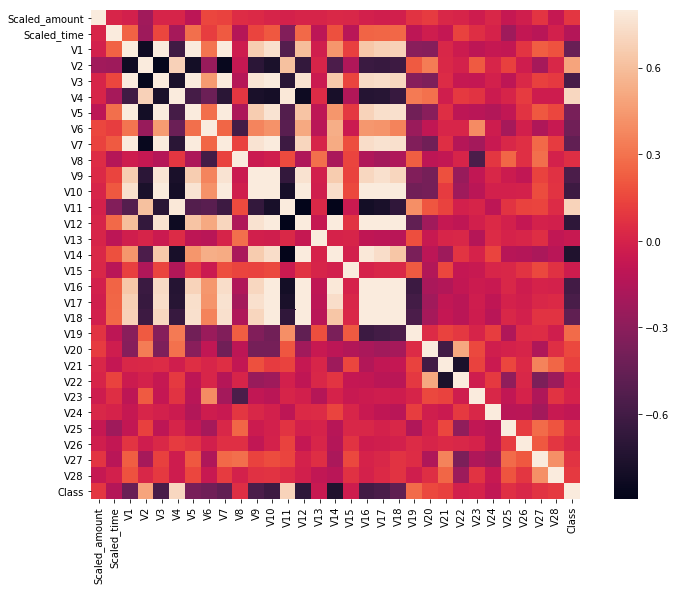

In [27]:
corrmat_subsample = subsample.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat_subsample, vmax = .8, square = True)
plt.show()

In [28]:
# negative correlations smaller than -0.5
corr = corrmat_subsample[['Class']]
corr[corr.Class < -0.5]

,Class
V3,-0.573115
V9,-0.558129
V10,-0.623790
V12,-0.685878
V14,-0.750959
V16,-0.603320
V17,-0.570164


#### Visualizing the features with high negative correlation

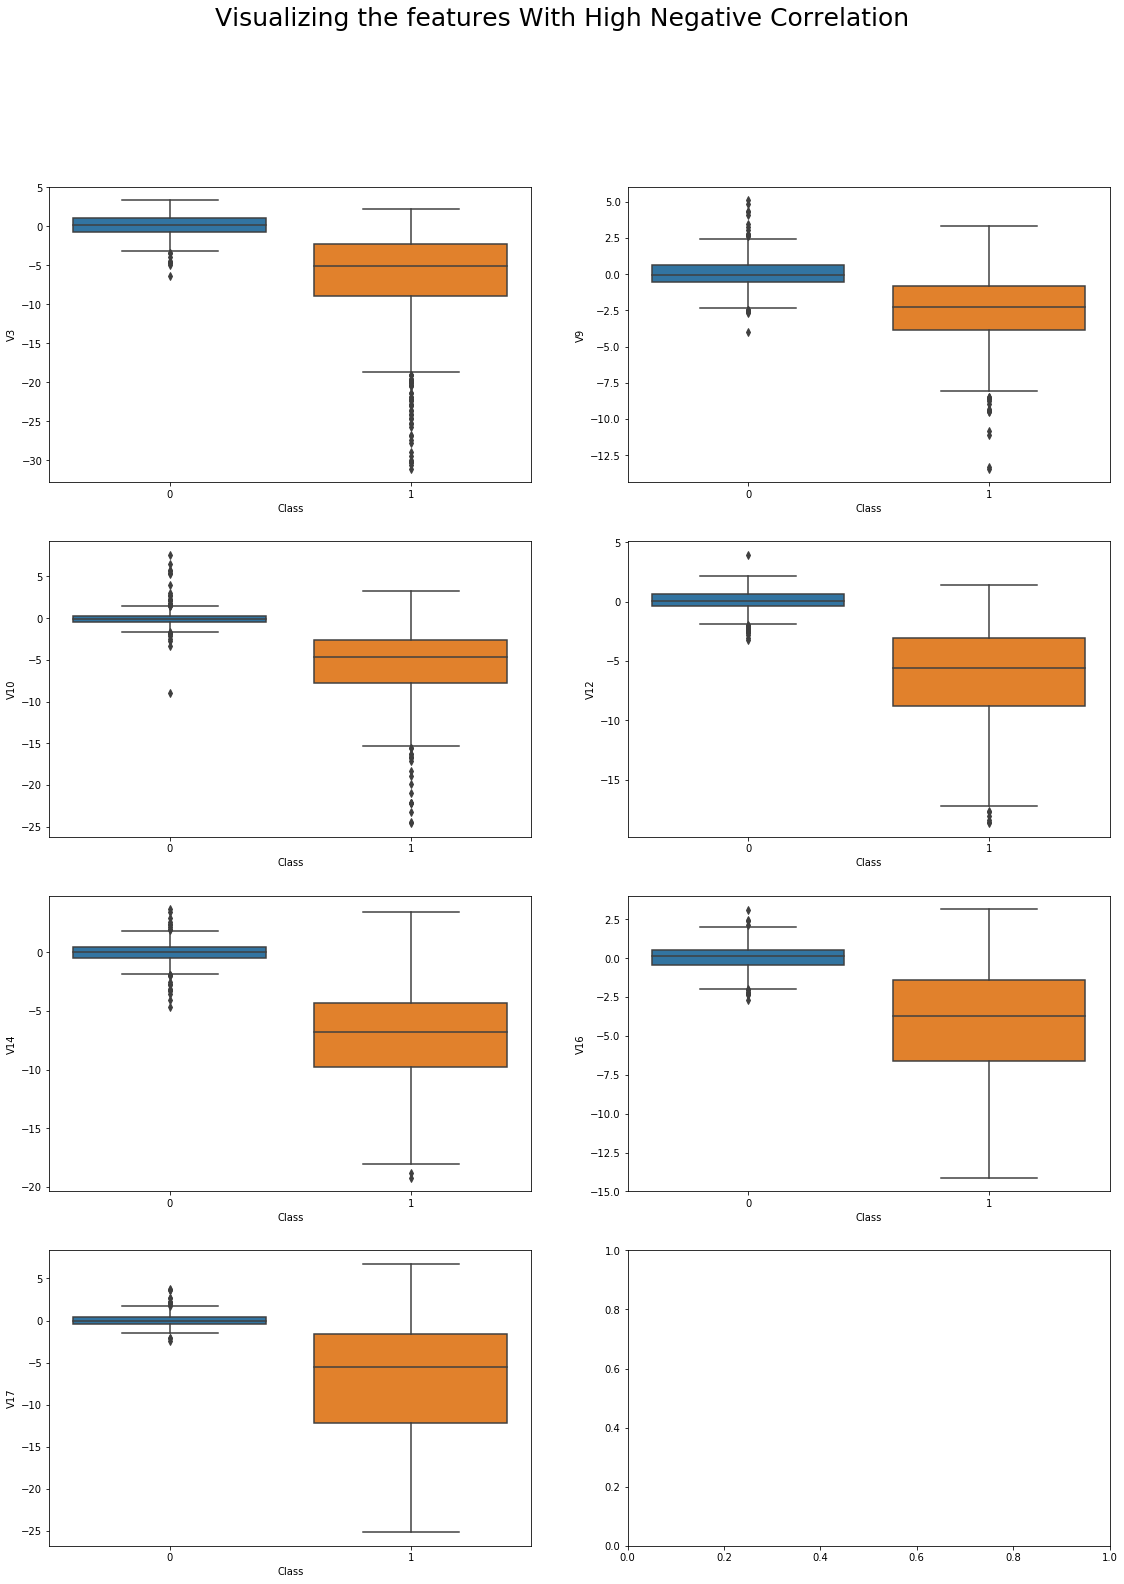

In [29]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(19,25))
f.suptitle('Visualizing the features With High Negative Correlation', size=25)

sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[2,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[2,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[3,0])


In [30]:
# positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.711376
V11,0.691013
Class,1.000000


#### Visualizing the features with high positive correlation

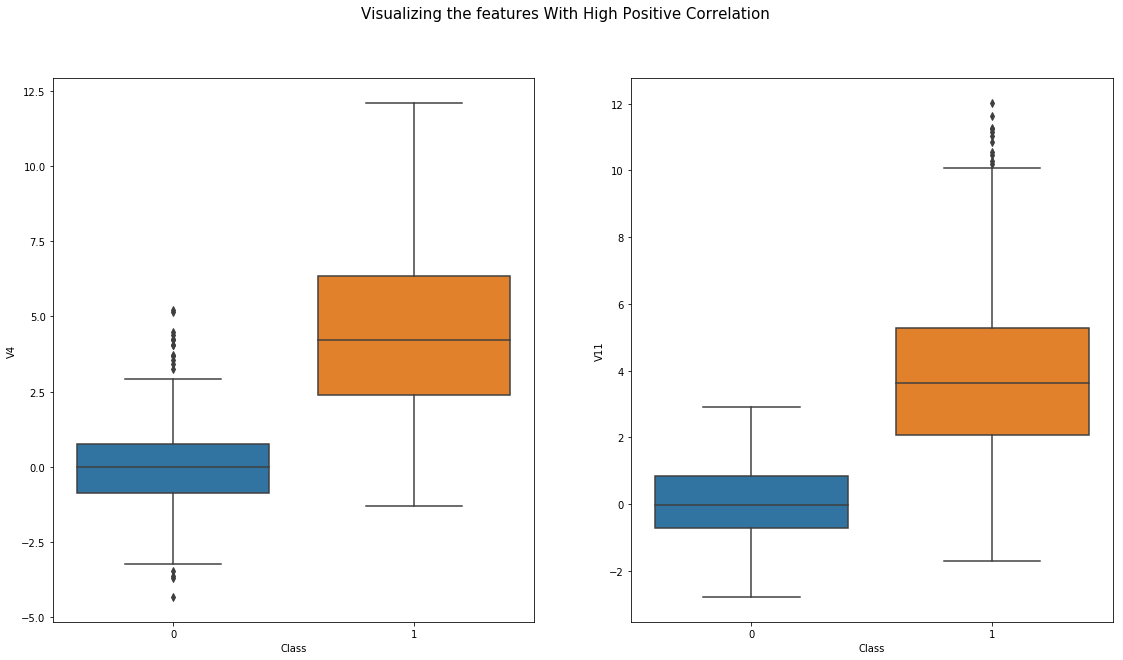

In [31]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(19,10))
f.suptitle('Visualizing the features With High Positive Correlation', size=15)

sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

### 6. Outlier Removal

Outlier removal has positive impact on accuracy of our models but it also has some tradeoffs. 

Box plots provide us with info about whether we need to worry about outliers as all variables outside of 1.5 times the IQR (Inter-Quartile Range) are usually considered to be outliers. 

#### Outlier removal Tradeoff

The higher the threshold (number multiplied by Inter quartile range) less the number of outliers  it will detect and if we take threshold to be less, removing many outliers would dramatically decrease our training data size and we run into the risk of information loss which will cause our models to have a lower accuracy.

Hence, we will focus on removing Extreme Outliers

#### Creating New Subsample after Extreme Outlier removal

In [32]:
# Calculation of Inter Quartile Range
Q25 = subsample.quantile(0.25)
Q75 = subsample.quantile(0.75)
IQR = Q75 - Q25

# Threshold number = 2.5*IQR
# Upper threshold = Q75 + 2.5*IQR
# Lower threshold = Q25 + 2.5*IQR
subsample_new = subsample[~((subsample < (Q25 - 2.5 * IQR)) |(subsample > (Q75 + 2.5 * IQR))).any(axis=1)]

#### Checking how our subsample changed after extreme outlier removal

In [33]:
len_after = len(subsample_new)
len_before = len(subsample)

print('Data size of old Subsample : {} transactions \n'
      'Data size of new Subsample : {} transactions \n'
      'Data size reduced by : {} transactions'
      'after using Extreme Outlier removal'.format(len_before, len_after, len_before - len_after))

Data size of old Subsample : 880 transactions 
Data size of new Subsample : 615 transactions 
Data size reduced by : 265 transactionsafter using Extreme Outlier removal


#### Visualizing how Subsample changed after Extreme Outlier removal

##### Visualizing the features with High Negative Correlation after Extreme Outlier removal

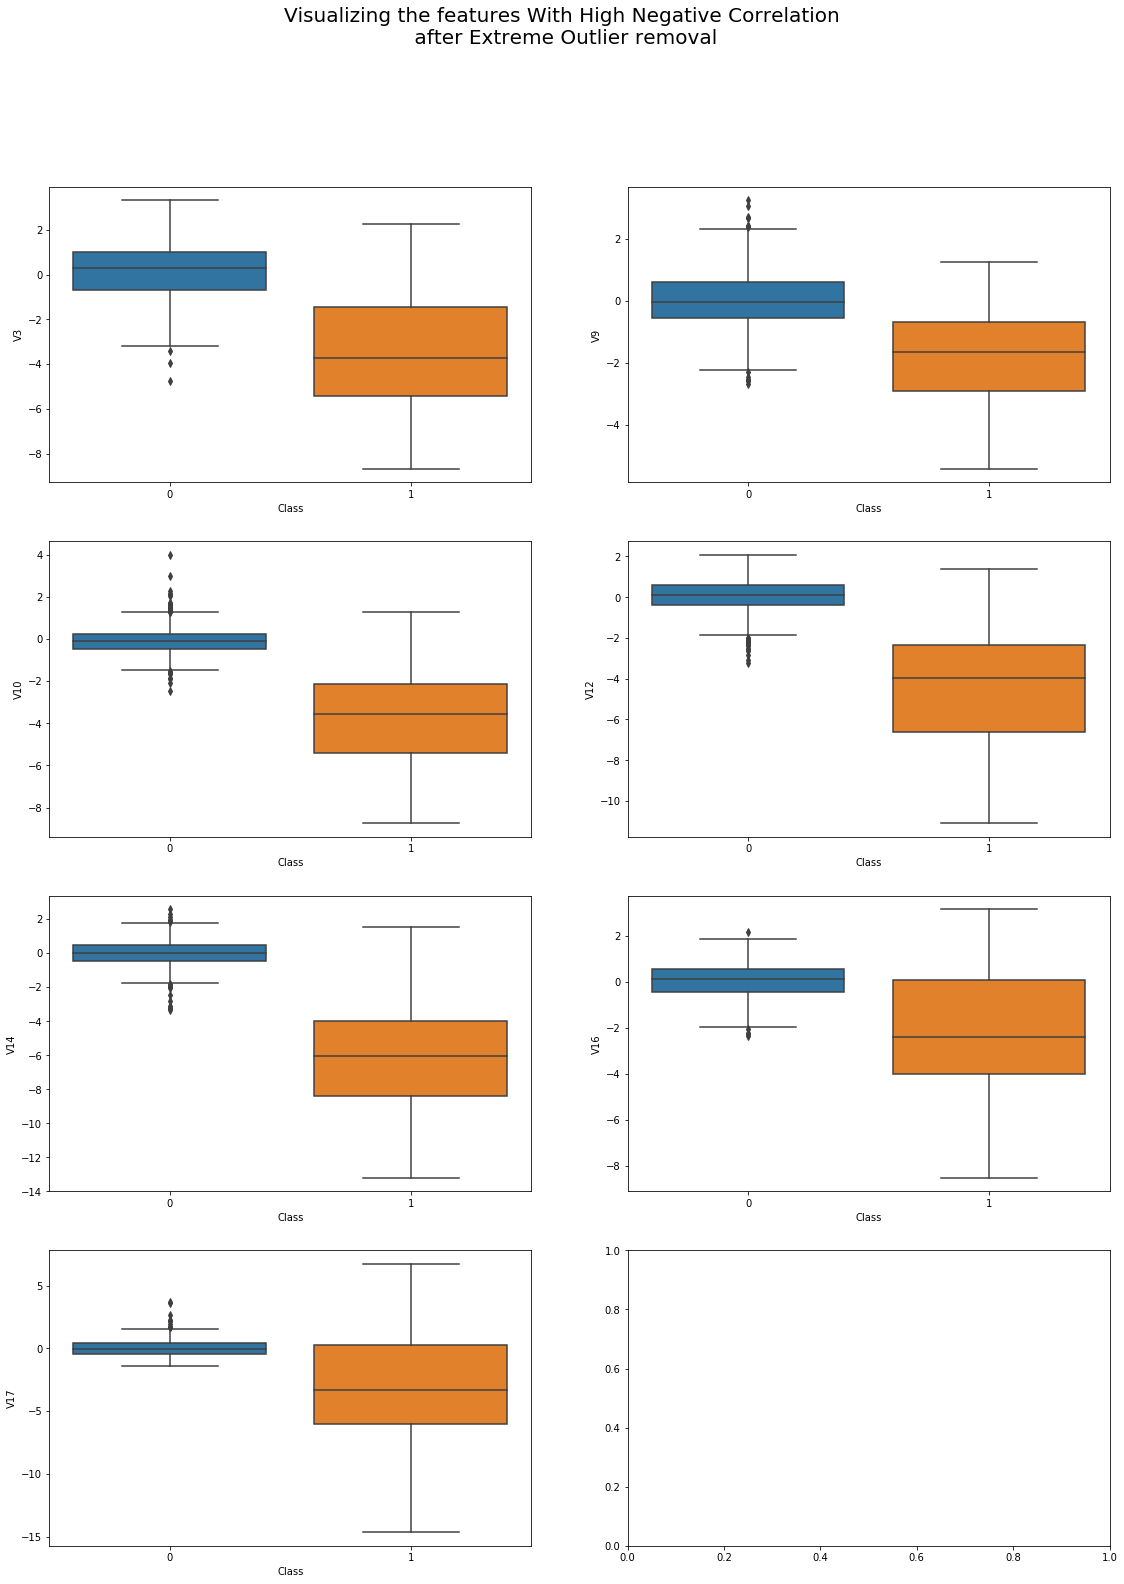

In [34]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(19,25))
f.suptitle('Visualizing the features With High Negative Correlation\n after Extreme Outlier removal', size=20)

sns.boxplot(x="Class", y="V3", data=subsample_new, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample_new, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample_new, ax=axes[1,0])
sns.boxplot(x="Class", y="V12", data=subsample_new, ax=axes[1,1])
sns.boxplot(x="Class", y="V14", data=subsample_new, ax=axes[2,0])
sns.boxplot(x="Class", y="V16", data=subsample_new, ax=axes[2,1])
sns.boxplot(x="Class", y="V17", data=subsample_new, ax=axes[3,0])

##### Visualizing the features with High Positive Correlation after Extreme Outlier removal

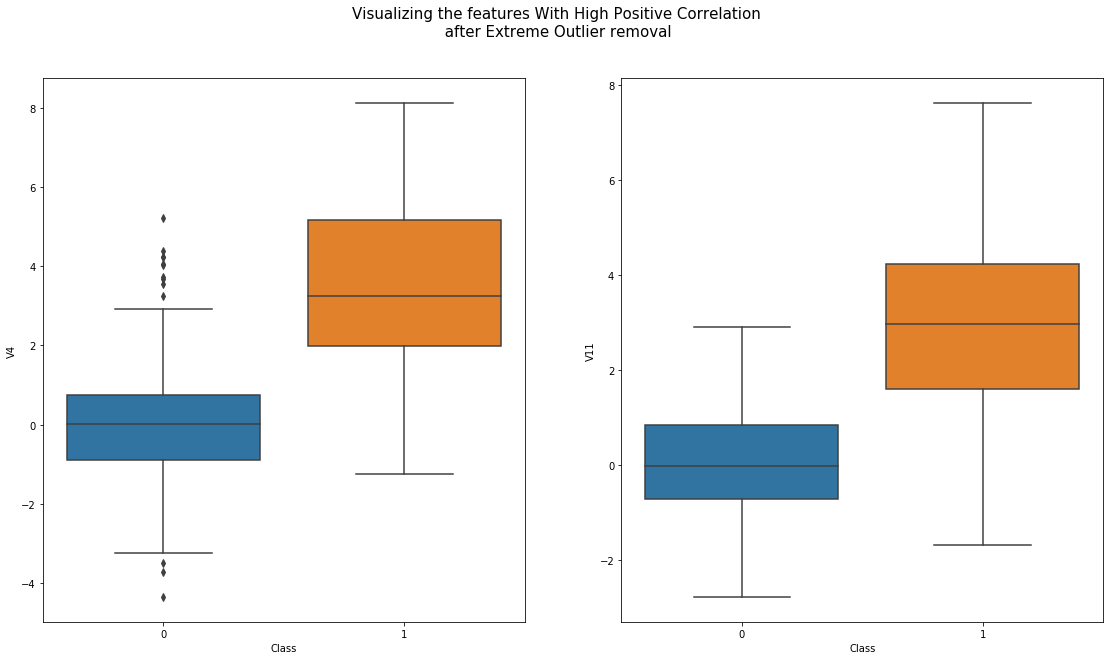

In [35]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(19,10))
f.suptitle('Visualizing the features With High Positive Correlation\n after Extreme Outlier removal', size=15)

sns.boxplot(x="Class", y="V4", data=subsample_new, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample_new, ax=axes[1])

### 7. Dimensionality Reduction using t-SNE for Visualization

#### Importing TSNE

In [36]:
from sklearn.manifold import TSNE

X = subsample_new.drop('Class', axis=1)
y = subsample_new['Class']

#### Using t-SNE for Dimensionality Reduction

In [37]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

#### Visualizing t-SNE scatter plot

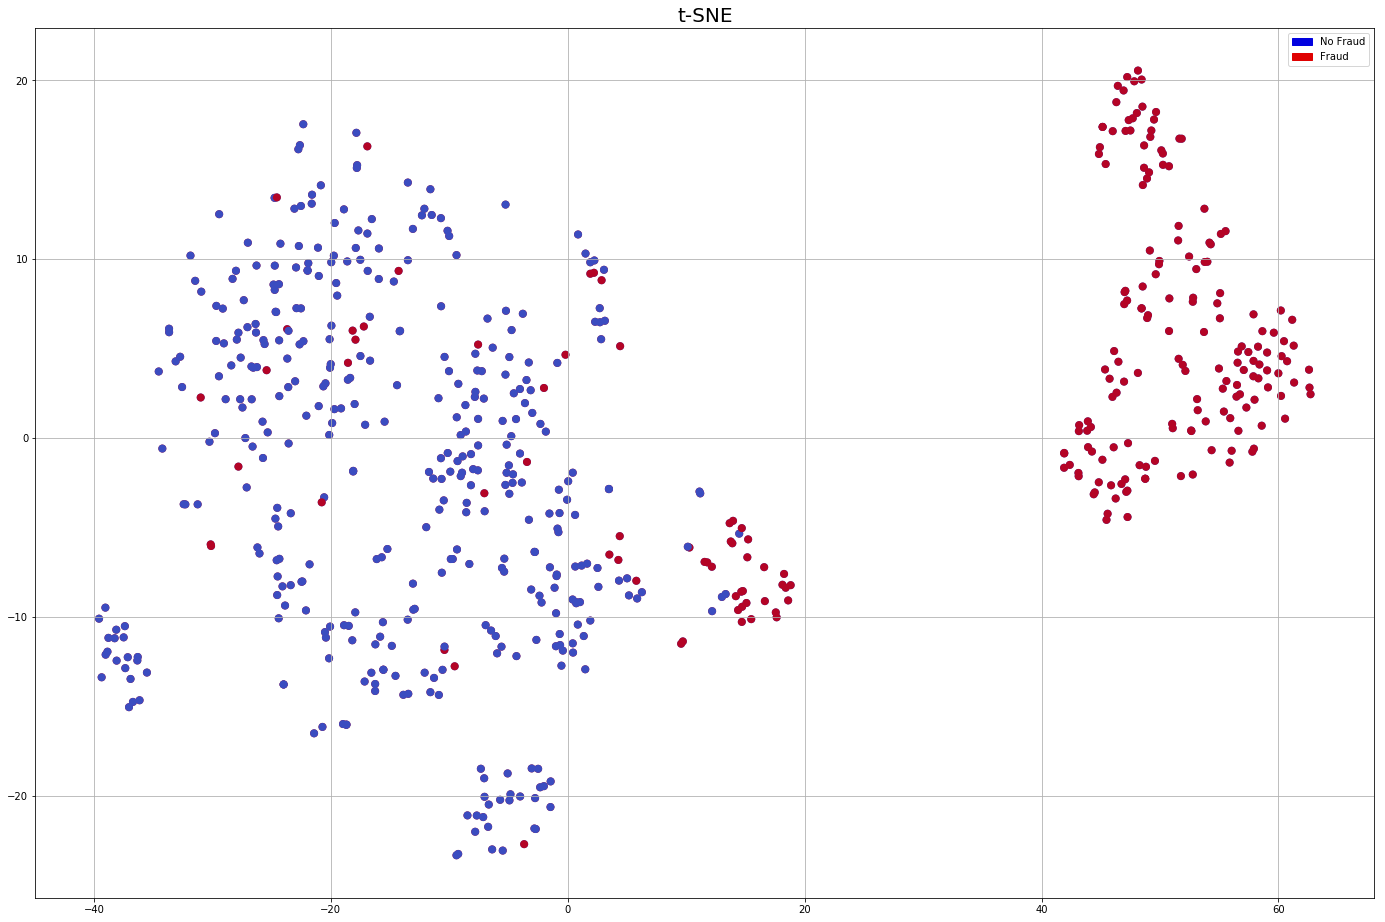

In [38]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0101DF', label='No Fraud')
red_patch = mpatches.Patch(color='#DF0101', label='Fraud')

ax.legend(handles=[blue_patch, red_patch])
ax.set_title('t-SNE', fontsize=20)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)


ax.grid(True)

### 8. Choosing Best Classification Algorithm

#### Importing Libraries

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### Splitting the data

In [41]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

#### Cross Validation scores of various classifiers models

In [44]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('K Nearest Neighbours', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Random Forest', RandomForestClassifier()))


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("Classifier: ", name, "Has a training score of", round(cv_results.mean(), 2) * 100, "% accuracy score")

Classifier:  Logistic Regression Has a training score of 97.0 % accuracy score
Classifier:  K Nearest Neighbours Has a training score of 96.0 % accuracy score
Classifier:  Decision Tree Has a training score of 88.0 % accuracy score
Classifier:  Support Vector Machine Has a training score of 96.0 % accuracy score
Classifier:  Random Forest Has a training score of 96.0 % accuracy score


/home/gaurav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gaurav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gaurav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gaurav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gaurav/anaconda3/lib/python3.7/site-pa

#### Comparing Cross Validation scores of various classifier models

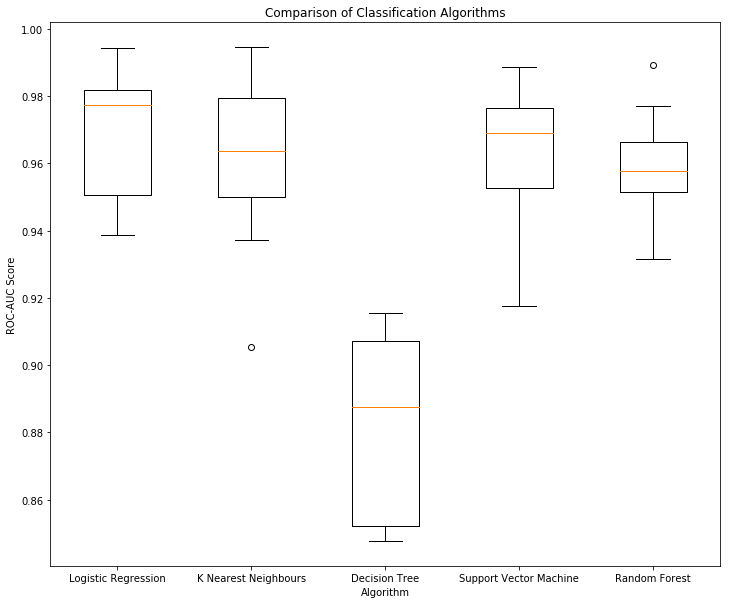

In [45]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

#### Using GridSearchCV for finding best parameters to fit to the classifier models

In [46]:
from sklearn.model_selection import GridSearchCV


# Best parameters to fit to the Logistic Regression classifier model
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# Best parameters to fit to the K Nearest Neighbour model
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Best parameters to fit to the Support Vector Classifier model
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_


#### ROC_AUC Score of classifier models

In [47]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svm_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")


print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('K Nearest Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svm_pred))

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_train, svm_pred)

Logistic Regression:  0.9690474524076148
K Nearest Neighbors:  0.9156634938409853
Support Vector Classifier:  0.9585141377379618


#### Logistic Regression ROC Curve

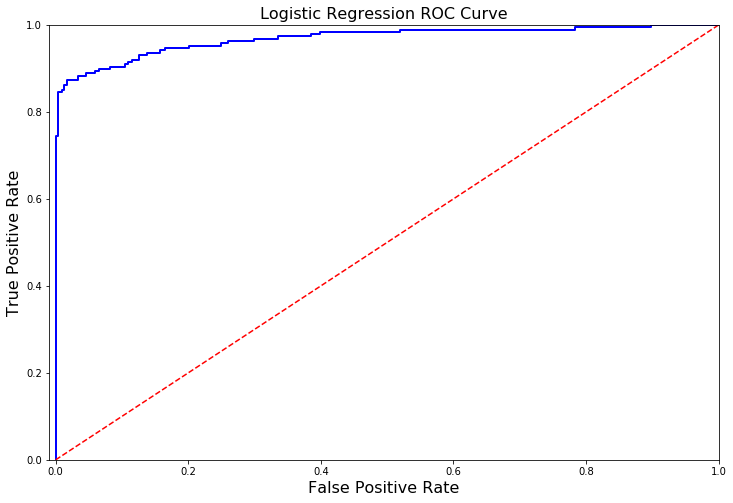

In [48]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

#### K Nearest Neighbour ROC Curve

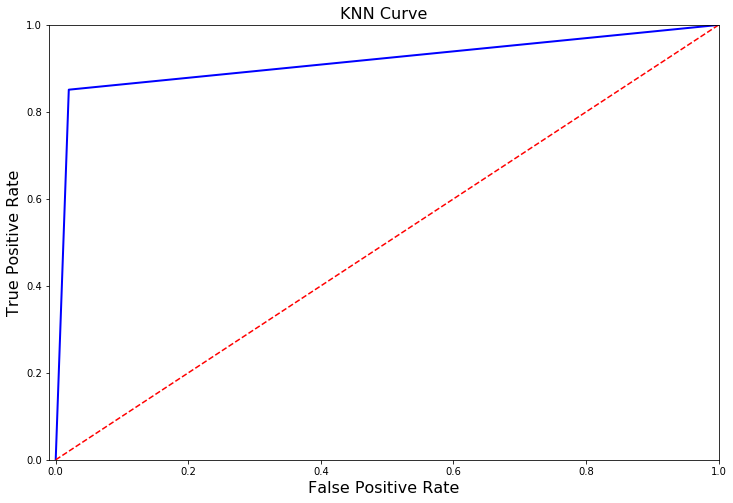

In [49]:
def knn_roc_curve(knear_fpr, knear_tpr):
    plt.figure(figsize=(12,8))
    plt.title('KNN Curve', fontsize=16)
    plt.plot(knear_fpr, knear_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
knn_roc_curve(knear_fpr, knear_tpr)
plt.show()

#### Support Vector Classifier ROC Curve

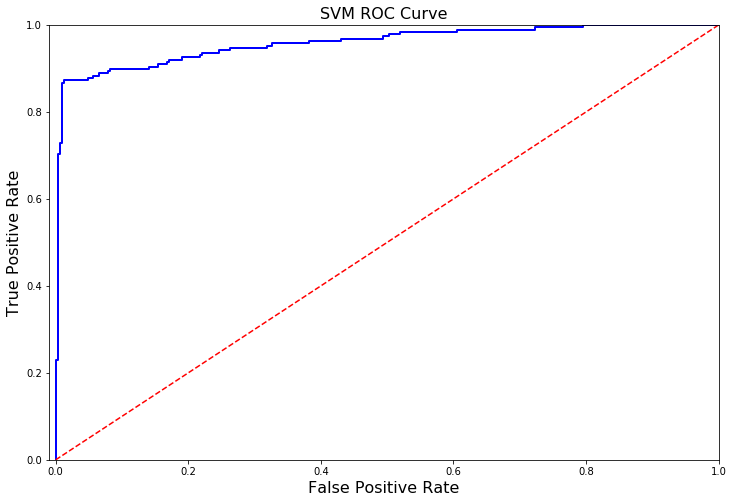

In [50]:
def svm_roc_curve(svm_fpr, svm_tpr):
    plt.figure(figsize=(12,8))
    plt.title('SVM ROC Curve', fontsize=16)
    plt.plot(svm_fpr, svm_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
svm_roc_curve(svm_fpr, svm_tpr)
plt.show()

### 9. Results on test data Using Logistic Regression

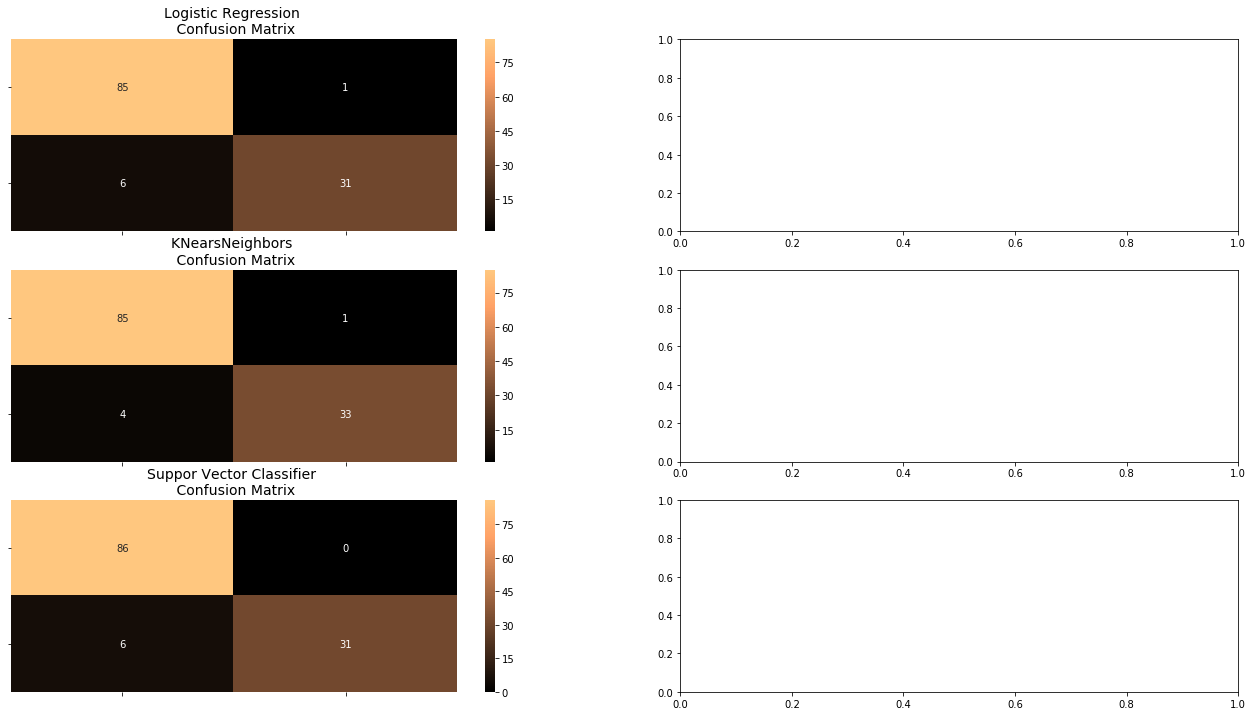

In [60]:
from sklearn.metrics import confusion_matrix

log_reg_sm = grid_log_reg.best_estimator_
y_pred_log_reg = log_reg_sm.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)



log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)


fig, ax = plt.subplots(3, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[2][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2][0].set_yticklabels(['', ''], fontsize=14, rotation=360)



plt.show()

In [61]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        86
           1       0.97      0.84      0.90        37

   micro avg       0.94      0.94      0.94       123
   macro avg       0.95      0.91      0.93       123
weighted avg       0.94      0.94      0.94       123

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        86
           1       0.97      0.89      0.93        37

   micro avg       0.96      0.96      0.96       123
   macro avg       0.96      0.94      0.95       123
weighted avg       0.96      0.96      0.96       123

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        86
           1       1.00      0.84      0.91        37

   micro avg       0.95      0.95      0.95       123
   macro avg       0.97      0.92      0.94       123
weighted